# Лабораторна робота № 3
## Оптимізація складних функцій однієї змінної генетичними алгоритмами

In [757]:
import random
import matplotlib.pyplot as plt

## Завдання
### Реалізувати для функції генетичний алгоритм, який знаходить екстремум такої функції та показати візуальну роботу даного алгоритму на обраній функції.

### 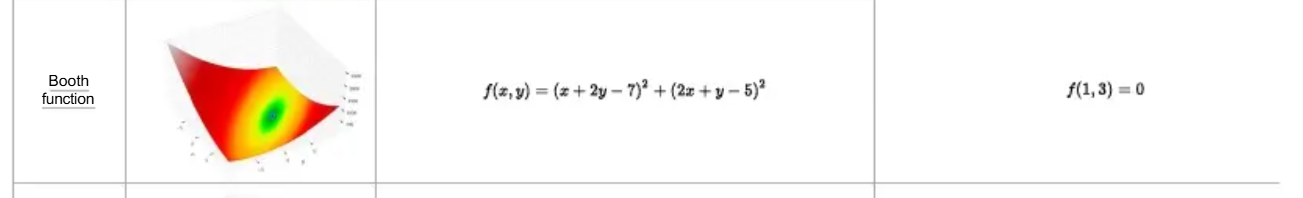

### 1. Створюємо початкову популяцію

In [758]:
def initial_population(pop_size, bounds_x,  bounds_y):

    population = []
    for _ in range(pop_size):
        x = random.uniform(bounds_x[0], bounds_x[1])
        y = random.uniform(bounds_y[0], bounds_y[1])
        population.append([x, y])
        
    return population

### 2. Визначення fitness функції 

In [759]:
def fitness_function(individual):
    
    x, y = individual
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

### 3. Функція відбору

In [760]:
def selection(population, fitnesses, size=3):
    
    selected = random.sample(list(zip(population, fitnesses)), size)
    selected.sort(key=lambda x: x[1]) 
    
    return selected[0][0]  

### 4. Функція crossover 

In [761]:
def crossover(parent1, parent2):

    x1, y1 = parent1
    x2, y2 = parent2
    alpha = random.random()

    child1 = [alpha * x1 + (1 - alpha) * x2,
              alpha * y1 + (1 - alpha) * y2]

    child2 = [(1 - alpha) * x1 + alpha * x2,
              (1 - alpha) * y1 + alpha * y2]

    return child1, child2

### 5. Функція мутації

In [762]:
def mutation(individual, bounds_x, bounds_y, mutation_probability, k):
    
    x, y = individual 
    if random.random() < mutation_probability:
        x += random.uniform(-k, k)
        x = max(bounds_x[0], min(bounds_x[1], x))  

    if random.random() < mutation_probability:
        y += random.uniform(-k, k)
        y = max(bounds_y[0], min(bounds_y[1], y)) 

    return [x, y]

### 6. Генетичний алгоритм та візуалізація

In [763]:
def plot_population(population, title):

    x = []
    y = []
    fitnesses = []

    for individual in population:
        x.append(individual[0])                  
        y.append(individual[1])                
        fitnesses.append(fitness_function(individual)) 

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, fitnesses, c=fitnesses, cmap='viridis', s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('fitness')
    ax.set_title(title)
    plt.show()

In [ ]:
def genetic_algorithm(pop_size, bounds_x, bounds_y, generations, mutation_probability, k):
    
    population = initial_population(pop_size, bounds_x, bounds_y)
    plot_population(population, title="Початкова популяція")
    
    for gen in range(generations):
    
        fitnesses = [fitness_function(i) for i in population]
        new_population = []

        while len(new_population) < pop_size:
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)

            child1 = mutation(child1, bounds_x, bounds_y, mutation_probability, k)
            child2 = mutation(child2, bounds_x, bounds_y, mutation_probability, k)

            new_population.extend([child1, child2])

        population = new_population

    plot_population(population, title="Фінальна популяція")
    best_solution = min(population, key=fitness_function)

    return best_solution

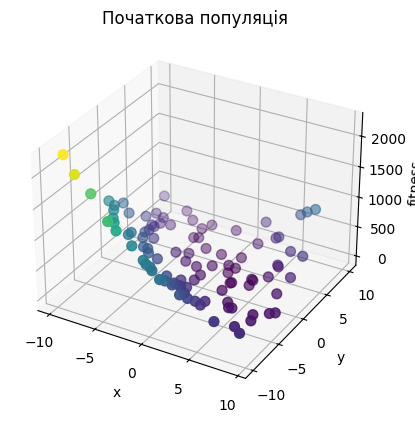

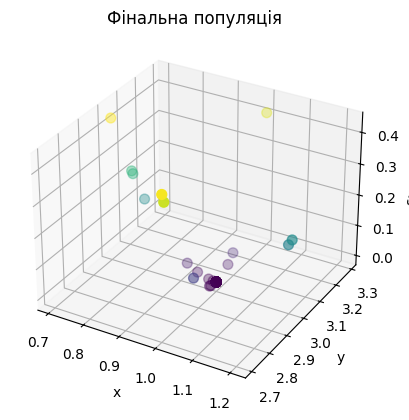


Найкращий знайдений розв'язок: [1.0000032454017191, 2.999996134608481]
Мінімальне значення функції: 0.0


In [765]:
best_solution = genetic_algorithm(
    pop_size=100, 
    bounds_x=(-10, 10),
    bounds_y=(-10, 10),
    generations=20,
    mutation_probability=0.1,
    k=0.3
)

print("\nНайкращий знайдений розв'язок:", best_solution)
print("Мінімальне значення функції:", round(fitness_function(best_solution), 3))